source: https://arcticdata.io/catalog/view/urn%3Auuid%3Ab017fd97-6ca9-4c54-84b0-a953b603fe5e

To cite this dataset: Core Program Beaufort Lagoon Ecosystems LTER. (2024). Sea ice thickness, snow depth, and sea ice freeboard in lagoon sites along the Alaska Beaufort Sea coast, 2019-ongoing. Arctic Data Center. urn:uuid:b017fd97-6ca9-4c54-84b0-a953b603fe5e.

"Sea ice thickness, snow depth, and sea ice freeboard in lagoon sites along the Alaska Beaufort Sea coast, 2019-ongoing"

Abstract: Physical parameters related to snow and sea ice have implications for lagoon circulation, sea-air heat exchange, and underwater light regimes. To understand these relationships and their greater effect on ecosystem function, the Beaufort Lagoon Ecosystem LTER (BLE LTER) uses in situ methods to assess snow depth, ice freeboard, and ice thickness in select water bodies across the Beaufort Sea coast (Elson Lagoon, Simpson Lagoon, Kaktovik Lagoon, Jago Lagoon, and Stefansson Sound). Sea ice thickness is the distance from sea ice bottom to top, not including snow. Freeboard, determined in the same drilled hole, is the distance from the surface of the water to the top of the ice, not including snow cover. Snow depth is taken within a 2-meter radius of the drilled hole in which ice thickness and ice freeboard were measured. A meter stick is inserted into the snow until the top of the ice is reached. These measurements are made annually, close to maximum ice thickness (typically April, under ice season).

In [276]:
import pandas as pd

dataframe = pd.read_csv('BLE_LTER_sea_ice_measurements.csv', parse_dates=["date_time"]) #transforming date_time colum into a Datetime

In [277]:
#get only the columns we want
df = pd.DataFrame(dataframe, columns=['lagoon','station_name','date_time','hole1_ice_thickness_m','hole2_ice_thickness_m',
                                'hole3_ice_thickness_m', 'spot1_snow_depth_m', 'spot2_snow_depth_m', 'spot3_snow_depth_m',
                                'spot4_snow_depth_m','spot5_snow_depth_m', 'spot6_snow_depth_m', 'spot7_snow_depth_m','spot8_snow_depth_m',
                                'spot9_snow_depth_m','spot10_snow_depth_m', 'freeboard_m', 'latitude', 'longitude', 'station'])

df.head()

,lagoon,station_name,date_time,hole1_ice_thickness_m,hole2_ice_thickness_m,hole3_ice_thickness_m,spot1_snow_depth_m,spot2_snow_depth_m,spot3_snow_depth_m,spot4_snow_depth_m,spot5_snow_depth_m,spot6_snow_depth_m,spot7_snow_depth_m,spot8_snow_depth_m,spot9_snow_depth_m,spot10_snow_depth_m,freeboard_m,latitude,longitude,station
0,Simpson,Simpson Lagoon Deep Station 1,2019-04-21 12:21:00-08:00,1.32,NaN,NaN,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,70.537067,-149.775350,SILD1
1,Simpson,Simpson Lagoon Deep Station 1,2021-04-23 12:20:00-08:00,1.71,NaN,NaN,0.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,70.537067,-149.775350,SILD1
2,Simpson,Simpson Lagoon Deep Station 1,2022-04-18 12:16:00-08:00,1.53,NaN,NaN,0.09,0.15,0.07,0.08,0.08,0.05,0.12,0.16,0.12,0.11,0.11,70.537067,-149.775350,SILD1
3,Simpson,Simpson Lagoon Deep Station 1,2023-04-20 11:12:00-08:00,1.40,1.2,NaN,0.04,0.09,0.08,0.37,0.41,0.16,0.26,0.17,0.25,0.13,0.08,70.537067,-149.775350,SILD1
4,Simpson,Simpson Lagoon Deep Station 2,2023-04-23 12:51:00-08:00,1.30,NaN,NaN,0.10,0.10,0.11,0.11,0.15,0.06,0.14,0.08,0.17,0.15,0.05,70.539883,-149.476583,SILD2


In [278]:
# I want to display the locations of the different measuring stations on a map
# I pivoted my dataframe to group by station name and get only latitude/longitude
# I used reset_index because this gives me a multi-index df. this way it is easier to acces my values
geo_df = pd.pivot_table(df, values=['latitude','longitude'], index=['station_name']).reset_index()

#get the name of the station, lat and long into a dictionary
data = { 'Station': geo_df.iloc[::]['station_name'], #this is how I can access my colum in a multi-index df
        'Latitude': geo_df.iloc[::]['latitude'],
        'Longitude': geo_df.iloc[::]['longitude']    
        }
#transform it into a dataframe again
geo_df2 = pd.DataFrame(data)


In [279]:
import folium

# Create a Folium map centered at the mean of the coordinates
map_center = [geo_df2['Latitude'].mean(), geo_df2['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=4)

# Add markers for each location
for index, row in geo_df2.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Station']).add_to(mymap)

# Display the map
mymap

In [280]:
#pivot my df to aggregate by lagoon and date_time rgarding ice thickness only
df1 = pd.pivot_table(df, values=['hole1_ice_thickness_m', 'hole2_ice_thickness_m', 'hole2_ice_thickness_m'],
                     index=['lagoon','station_name', 'date_time'])

df1.head()

hole1_ice_thickness_m  \
lagoon     station_name                        date_time                                          
Elson East Elson East Lagoon Deep Station 1    2019-04-16 12:25:00-08:00                   1.30   
                                               2021-04-27 11:15:00-08:00                   1.35   
                                               2022-04-13 14:05:00-08:00                   1.32   
                                               2023-04-20 16:30:00-08:00                   1.15   
Elson West Elson West Lagoon Craig E Tweedie 0 2022-04-18 12:00:00-08:00                   1.61   

                                                                          hole2_ice_thickness_m  \
lagoon     station_name                        date_time                                          
Elson East Elson East Lagoon Deep Station 1    2019-04-16 12:25:00-08:00                    NaN   
                                               2021-04-27 11:15:00-08:00                    NaN   
                                               2022-04-13 14:05:00-08:00                    NaN   
                                               2023-04-20 16:30:00-08:00                    1.3   
Elson West Elson West Lagoon Craig E Tweedie 0 2022-04-18 12:00:00-08:00                    NaN   

                                                                          hole2_ice_thickness_m  
lagoon     station_name                        date_time                                         
Elson East Elson East Lagoon Deep Station 1    2019-04-16 12:25:00-08:00                    NaN  
                                               2021-04-27 11:15:00-08:00                    NaN  
                                               2022-04-13 14:05:00-08:00                    NaN  
                                               2023-04-20 16:30:00-08:00                    1.3  
Elson West Elson West Lagoon Craig E Tweedie 0 2022-04-18 12:00:00-08:00                    NaN

In [281]:
#calculated the mean ice thickness from different holes at different times
#from pandas documentation: 
# “index” (axis=0, default), “columns” (axis=1) (int this case I wanted the mean from the different columns, so I passed 1)
# by default, it is excluding missing (NaN) data
df2 = df1.mean(1)

In [282]:
# could not reset index before, as it would not allow me to calculate the mean of the columns
df_reset = df2.reset_index()

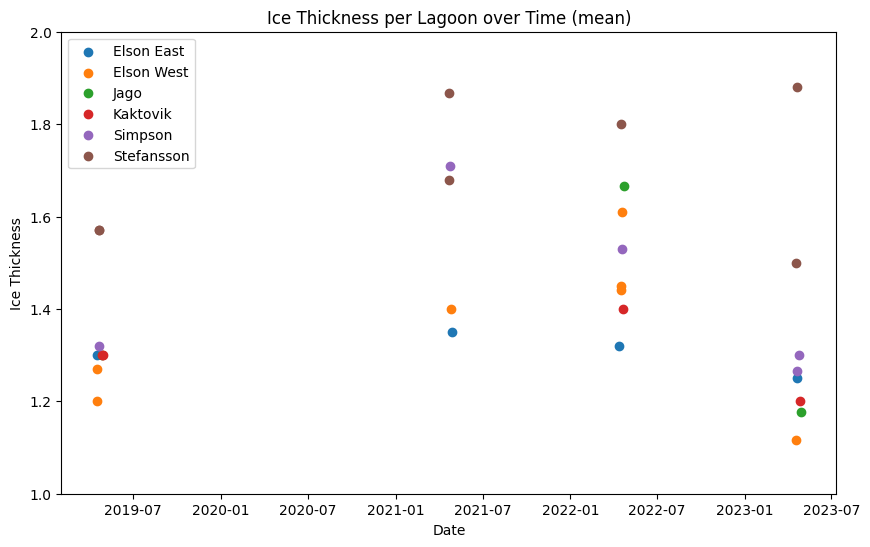

In [283]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for lagoon in df_reset['lagoon'].unique():
    lagoon_df = df_reset[df_reset['lagoon'] == lagoon]
    plt.scatter(lagoon_df['date_time'], lagoon_df[0], label=lagoon)

plt.xlabel('Date')
plt.ylabel('Ice Thickness')
# Set the size of the y-axis
plt.ylim(1, 2)
plt.title('Ice Thickness per Lagoon over Time (mean)')
plt.legend()
plt.show()

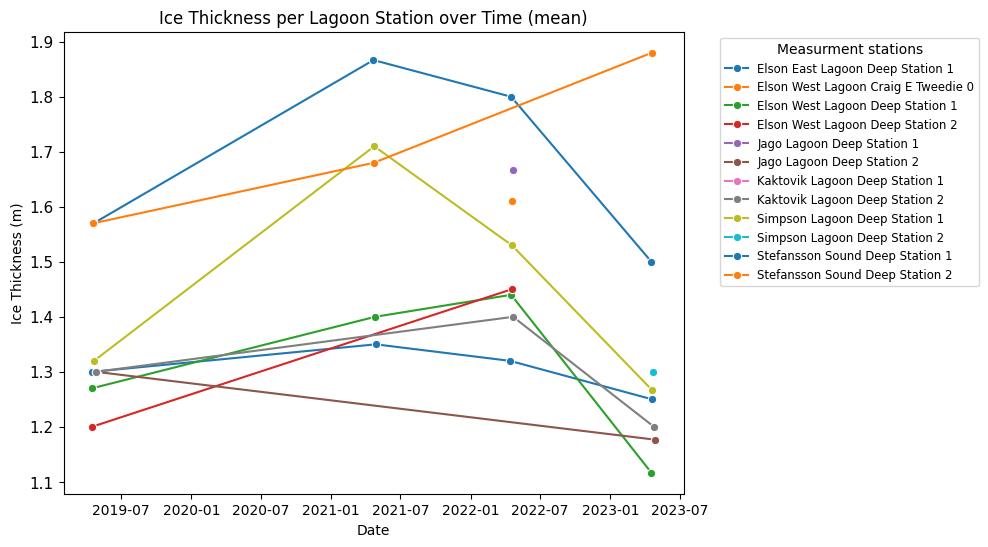

In [284]:
import seaborn as sns

# Set the size of the plot
plt.figure(figsize=(8, 6))  # Width, height in inches

for station in df_reset['station_name'].unique():  
    station_df = df_reset[df_reset['station_name'] == station]  
    sns.lineplot(x=station_df['date_time'], y=station_df[0], data=station_df, marker='o',label=station) # Style used to mark the join between 2 points

plt.xlabel('Date')
plt.ylabel('Ice Thickness (m)')
plt.yticks(fontsize=11)
plt.title('Ice Thickness per Lagoon Station over Time (mean)')
plt.legend(title="Measurment stations", loc="upper left", fontsize="small", bbox_to_anchor=(1.05, 1))
plt.show()